In [69]:
import pandas as pd #importing the file
import seaborn as sns # For plots
import numpy as np
import matplotlib.pyplot as plt #For plots
from scipy import stats
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [70]:
bank_data=pd.read_csv("bank-full.csv")#Reading the data from File

# Exploratory Data Analysis

In [71]:
bank_data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [72]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


The data has 45211 records with 17 attributes. There are 7 integer attribute and 10 object attributes.

In [73]:
dup = bank_data.duplicated()
sum(dup)

0

In [74]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no null value and no duplicates in the data 

In [75]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Univariate Analysis

Age

Maximum Age : 95
Minimum Age : 18
Average Age : 40.93621021432837
Data indicates data has more people of the Age 32
dtype: int64


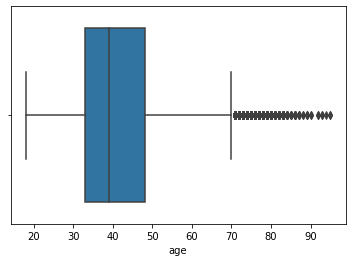

There are 487 outliners in the Age data


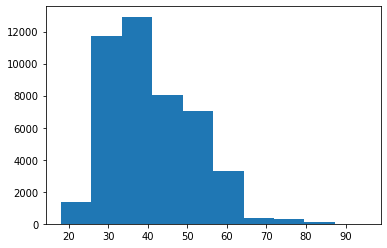

In [76]:
print('Maximum Age : {}'.format(bank_data.age.max()))
print('Minimum Age : {}'.format(bank_data.age.min()))
print('Average Age : {}'.format(bank_data.age.mean()))
m=str(bank_data.age.mode())[5:]
print('Data indicates data has more people of the Age {}'.format(m))
sns.boxplot(bank_data['age'])
plt.show()
Q3=bank_data['age'].quantile(q=0.75)
Q1=bank_data['age'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the Age data'.format(np.count_nonzero(bank_data['age']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['age']>(Q3+1.5*IQR))))
plt.hist(bank_data['age'])
plt.show()

Age Varies in a wide group. 
Maximum age in the data is 95 and minimum is 18. Also there are more records of the people with age 32.
The Age data is left skewed hence has lot of outliners and require scaling.

In [ ]:
Balance

Maximum Balance : 102127
Minimum Balance : -8019
Average Balance : 1362.2720576850766
Number of people with Negative Balance: 3766
Number of people with Zero Balance: 3514


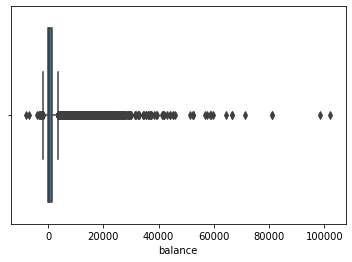

There are 4729 outliners in the Balance data


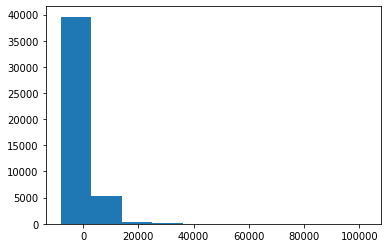

In [77]:
print('Maximum Balance : {}'.format(bank_data.balance.max()))
print('Minimum Balance : {}'.format(bank_data.balance.min()))
print('Average Balance : {}'.format(bank_data.balance.mean()))
nb=bank_data[bank_data.balance<0].shape
zb=bank_data[bank_data.balance==0].shape
print('Number of people with Negative Balance: {}'.format(nb[0]))
print('Number of people with Zero Balance: {}'.format(zb[0]))
sns.boxplot(bank_data['balance'])
plt.show()
Q3=bank_data['balance'].quantile(q=0.75)
Q1=bank_data['balance'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the Balance data'.format(np.count_nonzero(bank_data['balance']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['balance']>(Q3+1.5*IQR))))
plt.hist(bank_data['balance'])
plt.show()

Maximum Balance in the data is 102127 and minimum is 18. Also there records of the people having negative and zero balance.
The Balance data is left skewed hence has lot of outliners and require scaling.

Day

Maximum Day : 31
Minimum Day : 1


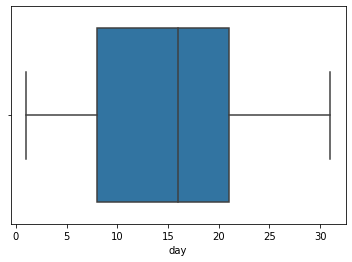

There are 0 outliners in the Day data


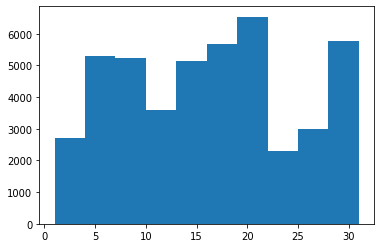

In [78]:
print('Maximum Day : {}'.format(bank_data.day.max()))
print('Minimum Day : {}'.format(bank_data.day.min()))
sns.boxplot(bank_data['day'])
plt.show()
Q3=bank_data['day'].quantile(q=0.75)
Q1=bank_data['day'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the Day data'.format(np.count_nonzero(bank_data['day']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['day']>(Q3+1.5*IQR))))
plt.hist(bank_data['day'])
plt.show()

Campagin was carried out on all days of the month and most calls were made on 20th day of the month.

Duration

Maximum Duration : 4918
Minimum Duration : 0
Average Duration : 258.1630797814691


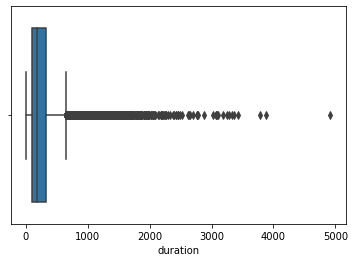

There are 3235 outliners in the Duration data


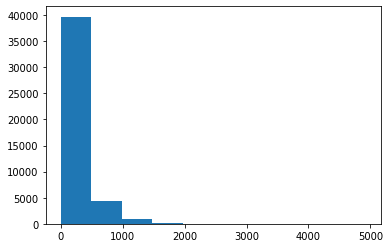

In [79]:
print('Maximum Duration : {}'.format(bank_data.duration.max()))
print('Minimum Duration : {}'.format(bank_data.duration.min()))
print('Average Duration : {}'.format(bank_data.duration.mean()))
sns.boxplot(bank_data['duration'])
plt.show()
Q3=bank_data['duration'].quantile(q=0.75)
Q1=bank_data['duration'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the Duration data'.format(np.count_nonzero(bank_data['duration']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['duration']>(Q3+1.5*IQR))))
plt.hist(bank_data['duration'])
plt.show()

Maximum call duration is 4981 secs and minimum is 0.
Data is left sckewd and has many outliners.

Campaign

Maximum contacts performed : 63
Minimum contacts performed : 1
Average Duration : 2.763840658246887


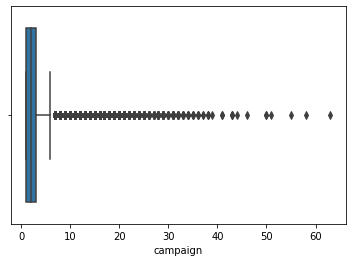

There are 3064 outliners in the Campaign data


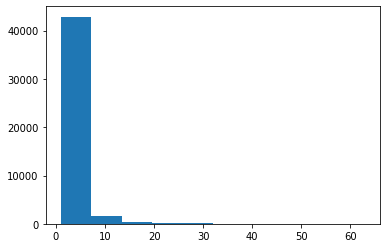

In [80]:
print('Maximum contacts performed : {}'.format(bank_data.campaign.max()))
print('Minimum contacts performed : {}'.format(bank_data.campaign.min()))
print('Average Duration : {}'.format(bank_data.campaign.mean()))
sns.boxplot(bank_data['campaign'])
plt.show()
Q3=bank_data['campaign'].quantile(q=0.75)
Q1=bank_data['campaign'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the Campaign data'.format(np.count_nonzero(bank_data['campaign']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['campaign']>(Q3+1.5*IQR))))
plt.hist(bank_data['campaign'])
plt.show()

Maximum call duration is 63 secs and Average duration of calls are around 3 secs
Data is left sckewd and has many outliners.

pdays

Maximum pdays : 871
Minimum pdays : -1
Average pdays : 40.19782796222158


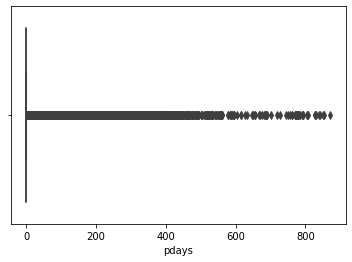

There are 8257 outliners in the Pdays data


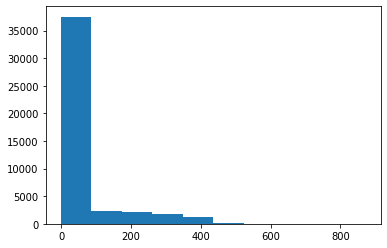

In [81]:
print('Maximum pdays : {}'.format(bank_data.pdays.max()))
print('Minimum pdays : {}'.format(bank_data.pdays.min()))
print('Average pdays : {}'.format(bank_data.pdays.mean()))
sns.boxplot(bank_data['pdays'])
plt.show()
Q3=bank_data['pdays'].quantile(q=0.75)
Q1=bank_data['pdays'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the Pdays data'.format(np.count_nonzero(bank_data['pdays']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['pdays']>(Q3+1.5*IQR))))
plt.hist(bank_data['pdays'])
plt.show()

Previous

Maximum previous : 275
Minimum previous : 0
Average previous : 0.5803233726305546


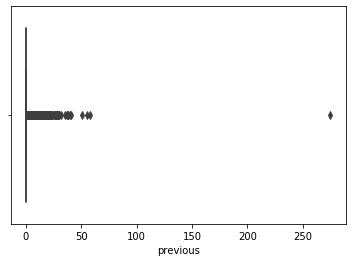

There are 8257 outliners in the previous data


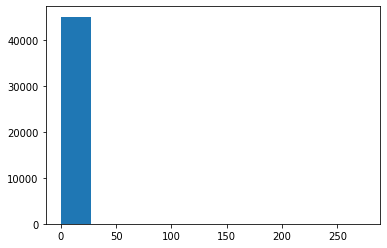

In [82]:
print('Maximum previous : {}'.format(bank_data.previous.max()))
print('Minimum previous : {}'.format(bank_data.previous.min()))
print('Average previous : {}'.format(bank_data.previous.mean()))
sns.boxplot(bank_data['previous'])
plt.show()
Q3=bank_data['previous'].quantile(q=0.75)
Q1=bank_data['previous'].quantile(q=0.25)
IQR=Q3-Q1
print('There are {} outliners in the previous data'.format(np.count_nonzero(bank_data['previous']<(Q1-1.5*IQR)) + np.count_nonzero(bank_data['previous']>(Q3+1.5*IQR))))
plt.hist(bank_data['previous'])
plt.show()

Maximum dayspassed by after the client was last contacted from a previous campaign is 871 and minimum is -1.
People with -1 pdays are the new customer who was not contacted in previous campaign.
On a average there will be approximately 40 days between each call.
Data is left sckewd and has many outliners.
There is only one extreme value in the previous and can be ignored for modeling

Categorical Variable Analysis

In [83]:
print('Job:\n ')
print('Unique Job Values :\n {}'.format(bank_data.job.unique()))
print('\nDistinct Job value counts :\n {}'.format(bank_data.job.value_counts()))

print('\n Marital:\n')
print('Unique Marital Values : \n{}'.format(bank_data.marital.unique()))
print('\nDistinct Marital value counts: \n{}'.format(bank_data.marital.value_counts()))

print('\n Education:\n')
print('Unique Education Values : \n{}'.format(bank_data.education.unique()))
print('\nDistinct Education value counts: \n{}'.format(bank_data.education.value_counts()))

print('\nDefault:\n ')
print('Unique Job Values :\n {}'.format(bank_data.default.unique()))
print('\nDistinct Job value counts: \n{}'.format(bank_data.default.value_counts()))

print('\Housing Loan:\n ')
print('Unique Housing Loan Values :\n {}'.format(bank_data.housing.unique()))
print('\nDistinct Housing Loan value counts: \n{}'.format(bank_data.housing.value_counts()))

print('\Personal Loan:\n ')
print('Unique Personal Loan Values :\n {}'.format(bank_data.loan.unique()))
print('\nDistinct Personal Loan value counts: \n{}'.format(bank_data.loan.value_counts()))

print('\Contact:\n ')
print('Unique Contact Values :\n {}'.format(bank_data.contact.unique()))
print('\nDistinct Contact value counts: \n{}'.format(bank_data.contact.value_counts()))

print('\Month:\n ')
print('Unique Month Values :\n {}'.format(bank_data.month.unique()))
print('\nDistinct Month value counts: \n{}'.format(bank_data.month.value_counts()))

print('\Poutcome:\n ')
print('Unique poutcome Values :\n {}'.format(bank_data.poutcome.unique()))
print('\nDistinct poutcome value counts: \n{}'.format(bank_data.poutcome.value_counts()))

Job:
 
Unique Job Values :
 ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Distinct Job value counts :
 blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

 Marital:

Unique Marital Values : 
['married' 'single' 'divorced']

Distinct Marital value counts: 
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

 Education:

Unique Education Values : 
['tertiary' 'secondary' 'unknown' 'primary']

Distinct Education value counts: 
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Default:
 
Unique Job Values :
 ['no' 'yes']

Distinct Job value counts: 
no     44396
yes  

There are 12 distinct Job types. There are more people with Blue-collar jobs.
In the data set we have more married people and people who have pursued secondary education.
Also there are more non defaulters in the data.

Marketing campaign is focused more on below group of people:

    1. People having blue collar jobs
    2. People who are married
    3. People who have pursured till secondary education
    4. People who are non defaulters.
    5. People who have availed housing loan.
    6. People who have not availed personal loan.

Main communication type used in Campaign is Cellular and Campaign was very active in month of May.
There are more new customers in the campign hence the poutcome is unknown for most of the records. 
Also there are few records with poutcome as other this is the noise in the data.

Target Column analysis

In [84]:
 bank_data.groupby('Target')['Target'].count()

Target
no     39922
yes     5289
Name: Target, dtype: int64

In the previous campaign only 11 % of the people have availed the product of bank.

# Bivariate Analysis

In [85]:
bd=bank_data[bank_data['Target']=='yes'].copy()

              Target
Age_Category        
(20, 30]        1112
(30, 40]        1812
(40, 50]        1019
(50, 60]         811
(60, 70]         284
(70, 80]         175
(80, 90]          38
(90, 100]          5


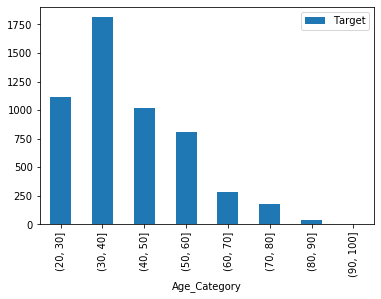

In [86]:
bd['Age_Category']=pd.cut(x=bd['age'], bins=[20, 30, 40, 50, 60, 70,80,90,100])
a=pd.pivot_table(bd, index='Age_Category',values='Target', aggfunc='count')
print (a)
pd.pivot_table(bd, index='Age_Category',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

               Target
job                  
admin.            631
blue-collar       708
entrepreneur      123
housemaid         109
management       1301
retired           516
self-employed     187
services          369
student           269
technician        840
unemployed        202
unknown            34


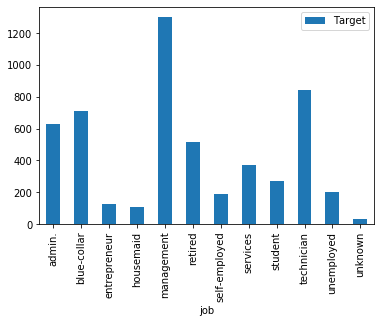

In [87]:
j=pd.pivot_table(bd, index='job',values='Target', aggfunc='count')
print(j)
pd.pivot_table(bd, index='job',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

          Target
marital         
divorced     622
married     2755
single      1912


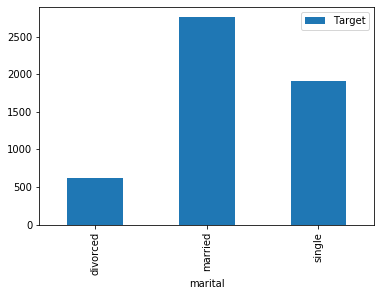

In [88]:
j=pd.pivot_table(bd, index='marital',values='Target', aggfunc='count')
print(j)
pd.pivot_table(bd, index='marital',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

           Target
education        
primary       591
secondary    2450
tertiary     1996
unknown       252


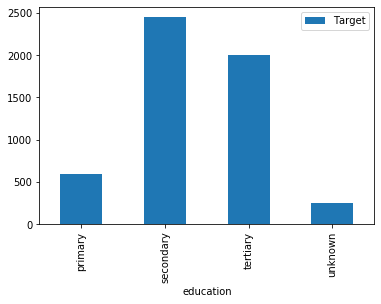

In [89]:
e=pd.pivot_table(bd, index='education',values='Target', aggfunc='count')
print(e)
pd.pivot_table(bd, index='education',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

         Target
default        
no         5237
yes          52


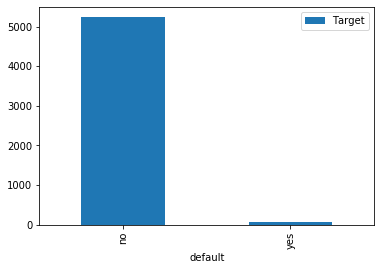

In [90]:
d=pd.pivot_table(bd, index='default',values='Target', aggfunc='count')
print(d)
pd.pivot_table(bd, index='default',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

In [91]:
positive_count=0
negative_count=0
for bal in bd['balance']: 
      
    # checking condition 
    if bal >= 0: 
        positive_count += 1
  
    else: 
        negative_count += 1
print('There are {} people who have availed bank product with negative balance and {} with balance'.format(negative_count,positive_count))        

There are 210 people who have availed bank product with negative balance and 5079 with balance


         Target
housing        
no         3354
yes        1935


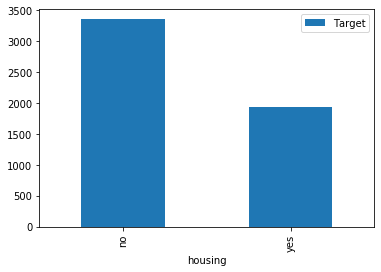

In [92]:
h=pd.pivot_table(bd, index='housing',values='Target', aggfunc='count')
print(h)
pd.pivot_table(bd, index='housing',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

      Target
loan        
no      4805
yes      484


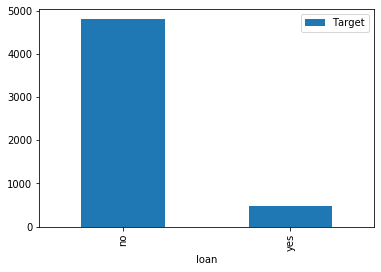

In [93]:
l=pd.pivot_table(bd, index='loan',values='Target', aggfunc='count')
print(l)
pd.pivot_table(bd, index='loan',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

           Target
contact          
cellular     4369
telephone     390
unknown       530


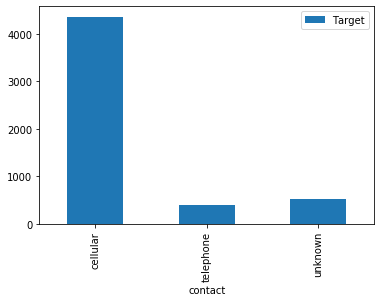

In [94]:
c=pd.pivot_table(bd, index='contact',values='Target', aggfunc='count')
print(c)
pd.pivot_table(bd, index='contact',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

              Target
Day_Category        
(1, 7]          1143
(7, 14]         1377
(14, 21]        1349
(21, 28]         884
(28, 31]         446


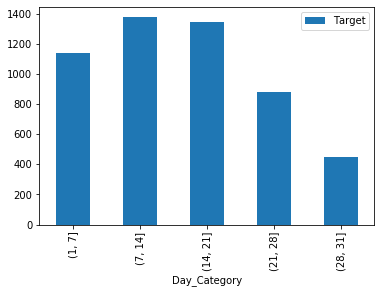

In [95]:
bd['Day_Category']=pd.cut(x=bd['day'], bins=[1,7,14,21,28,31])
dc=pd.pivot_table(bd, index='Day_Category',values='Target', aggfunc='count')
print (dc)
pd.pivot_table(bd, index='Day_Category',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

       Target
month        
apr       577
aug       688
dec       100
feb       441
jan       142
jul       627
jun       546
mar       248
may       925
nov       403
oct       323
sep       269


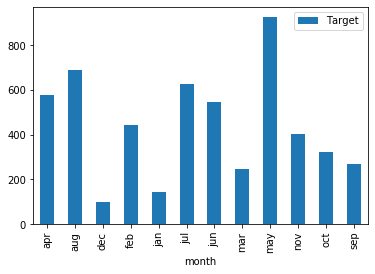

In [96]:
mc=pd.pivot_table(bd, index='month',values='Target', aggfunc='count')
print(mc)
pd.pivot_table(bd, index='month',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

                           Target
Contact_Duration_Category        
(0, 600]                     3456
(600, 1200]                  1487
(1200, 1800]                  291
(1800, 2400]                   39


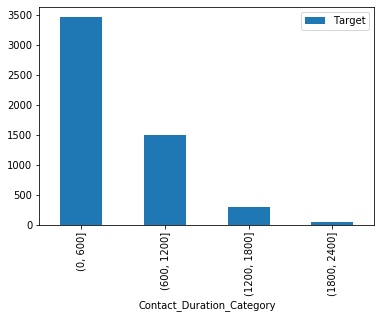

In [97]:
bd['Contact_Duration_Category']=pd.cut(x=bd['duration'], bins=[0,600,1200,1800,2400])
cdc=pd.pivot_table(bd, index='Contact_Duration_Category',values='Target', aggfunc='count')
print (cdc)
pd.pivot_table(bd, index='Contact_Duration_Category',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

                            Target
Number_of_Contact_Category        
(0, 5]                        5036
(5, 10]                        206
(10, 15]                        34
(15, 20]                         9
(20, 25]                         2
(25, 30]                         1
(30, 35]                         1


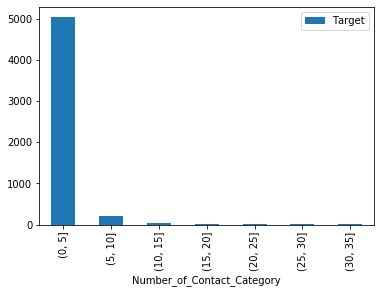

In [98]:
bd['Number_of_Contact_Category']=pd.cut(x=bd['campaign'], bins=[0,5,10,15,20,25,30,35])
ncc=pd.pivot_table(bd, index='Number_of_Contact_Category',values='Target', aggfunc='count')
print (ncc)
pd.pivot_table(bd, index='Number_of_Contact_Category',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

                Target
Pdays_Category        
(-2, 0]           3384
(0, 100]           622
(100, 200]         745
(200, 300]         196
(300, 400]         227
(400, 500]          71
(500, 600]          25
(600, 700]           6
(700, 800]           8
(800, 900]           5


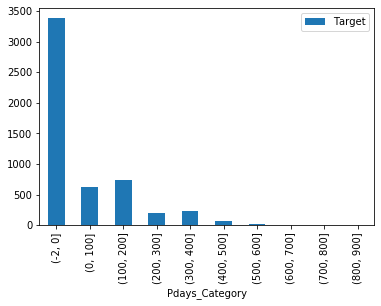

In [99]:
bd['Pdays_Category']=pd.cut(x=bd['pdays'], bins=[-2,0,100,200,300,400,500,600,700,800,900])
pc=pd.pivot_table(bd, index='Pdays_Category',values='Target', aggfunc='count')
print (pc)
pd.pivot_table(bd, index='Pdays_Category',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

                           Target
Previous_Campaign_contact        
(0, 5]                       1625
(5, 10]                       226
(10, 15]                       40
(15, 20]                        6
(20, 25]                        3
(25, 30]                        3
(30, 35]                        0
(35, 40]                        0
(40, 45]                        0
(45, 50]                        0
(50, 55]                        1
(55, 60]                        1


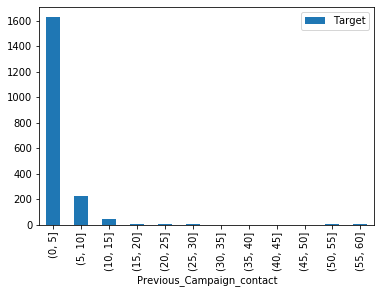

In [100]:
bd['Previous_Campaign_contact']=pd.cut(x=bd['previous'], bins=[0,5,10,15,20,25,30,35,40,45,50,55,60])
pcc=pd.pivot_table(bd, index='Previous_Campaign_contact',values='Target', aggfunc='count')
print (pcc)
pd.pivot_table(bd, index='Previous_Campaign_contact',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

          Target
poutcome        
failure      618
other        307
success      978
unknown     3386


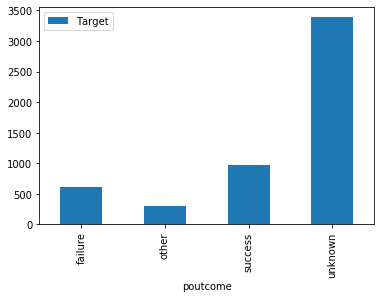

In [101]:
poc=pd.pivot_table(bd, index='poutcome',values='Target', aggfunc='count')
print(poc)
pd.pivot_table(bd, index='poutcome',values='Target', aggfunc='count').plot(kind='bar')
plt.show()

More people from below categories have availed the bank product in previous campaign.

    1.  People whose age falls in the 30-40 category
    2.  People having management job
    3.  People who are married
    4.  People who have pursued seconday education
    5.  People who are non defaulters
    6.  People who has balance.
    7.  People who have not availed housing loan
    8.  People who have not availed personal loan
    9.  People who were contacted through cellular phone.
    10. People who recieved the communication in between 7th an 21st day of the month
    
 Sales of the bank product was more in the month of May.
 People who have less call duration (less than 10 mins) have availed the bank product more than people who had longer call        duration.
 More people have avaialed the product within 5 contacts.
 New clients who were never contacted(negative pdays and poutcome of unknown) have availed the banking product more than   
   exsisting customers.

Multivariate Analysis

In [102]:
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


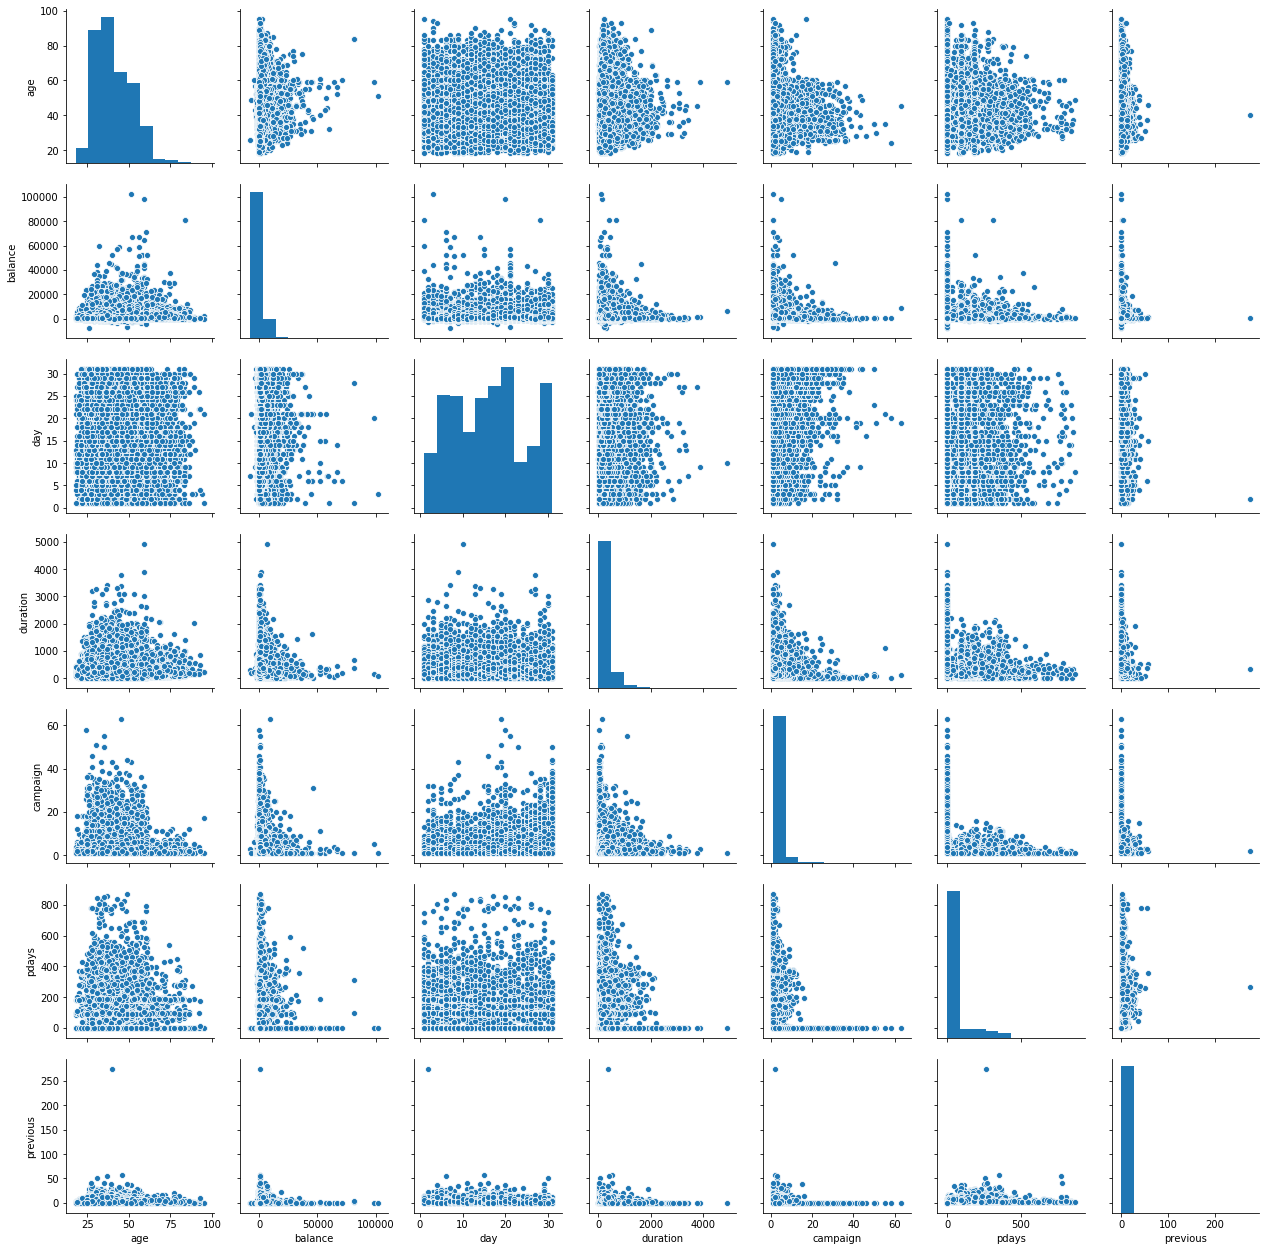

In [103]:
sns.pairplot(bank_data)
plt.show()

There is some corelation between pdays and previous. Not much of correlation between other attributes.

# Preparing the data

Convert the target attribute.

In [104]:
bank_data_Scaled=bank_data.copy()
bank_data_Scaled['Target'].replace({"yes":1,"no":0},inplace=True)
bank_data_Scaled['default'].replace({"yes":1,"no":0},inplace=True)
bank_data_Scaled['housing'].replace({"yes":1,"no":0},inplace=True)
bank_data_Scaled['loan'].replace({"yes":1,"no":0},inplace=True)
bank_data_Scaled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


Convert other categorical variables

In [105]:
labelencoder = LabelEncoder()
bank_data_Scaled['JobId'] = labelencoder.fit_transform(bank_data_Scaled.job) 
bank_data_Scaled['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
cols_cat = [ 'marital', 'education', 'contact', 'poutcome']
bank_data_Scaled=pd.get_dummies(bank_data_Scaled,columns=cols_cat)

In [5]:
bank_data_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 28 columns):
age                    45211 non-null int64
job                    45211 non-null object
default                45211 non-null int64
balance                45211 non-null int64
housing                45211 non-null int64
loan                   45211 non-null int64
day                    45211 non-null int64
month                  45211 non-null int64
duration               45211 non-null int64
campaign               45211 non-null int64
pdays                  45211 non-null int64
previous               45211 non-null int64
Target                 45211 non-null int64
JobId                  45211 non-null int32
marital_divorced       45211 non-null uint8
marital_married        45211 non-null uint8
marital_single         45211 non-null uint8
education_primary      45211 non-null uint8
education_secondary    45211 non-null uint8
education_tertiary     45211 non-null uint8
education_

In [106]:
#Drop the categorical attributes which has been transformed.
bank_data_Scaled.drop(['job'],axis=1,inplace=True)
bank_data_Scaled.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


Scaling & Normalization

In [107]:
#Dropping one extreme value for Previous
bank_data_Scaled.drop(bank_data[bank_data['previous']==275].index,axis=0,inplace=True)
#Replacing the -1 values which indicte people never contacted before to 0
bank_data_Scaled['pdays'].replace({-1:0},inplace=True)
#Removing the duration column as it is not known before the call and cannot be used for prediction
bank_data_Scaled.drop('duration',axis=1,inplace=True)

Since there are many outliers applying robustscaler.

In [108]:
transformer = RobustScaler().fit(bank_data_Scaled)
bd_random=transformer.transform(bank_data_Scaled)
bank_data_Scaled = pd.DataFrame(bd_random, columns = ['age','default','balance','housing','loan','day','month','campaign',
'pdays','previous','Target','JobId','marital_married','marital_single','marital_divorced','education_primary',
'education_secondary','education_tertiary','education_unknown','contact_cellular','contact_telephone','contact_unknown',
'poutcome_failure','poutcome_other','poutcome_success','poutcome_unknown'])
bank_data_Scaled.head()

,age,default,balance,housing,loan,day,month,campaign,pdays,previous,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.266667,0.0,1.250000,0.0,0.0,-0.846154,-0.333333,-0.5,0.0,0.0,...,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.333333,0.0,-0.308997,0.0,0.0,-0.846154,-0.333333,-0.5,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.400000,0.0,-0.328909,0.0,1.0,-0.846154,-0.333333,-0.5,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.533333,0.0,0.780236,0.0,0.0,-0.846154,-0.333333,-0.5,0.0,0.0,...,-1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.400000,0.0,-0.329646,-1.0,0.0,-0.846154,-0.333333,-0.5,0.0,0.0,...,-1.0,0.0,1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0


# Splitting data for train and test

In [109]:
X = bank_data_Scaled.drop('Target',axis=1)     # Predictor feature columns (8 X m)
Y = bank_data_Scaled['Target']   # Predicted class (1=True, 0=False) (1 X m)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
print("Original Target True Values    : {0} ({1:0.2f}%)".format(len(bank_data_Scaled.loc[bank_data_Scaled['Target'] == 1]), (len(bank_data_Scaled.loc[bank_data_Scaled['Target'] == 1])/len(bank_data_Scaled.index)) * 100))
print("Original Target False Values   : {0} ({1:0.2f}%)".format(len(bank_data_Scaled.loc[bank_data_Scaled['Target'] == 0]), (len(bank_data_Scaled.loc[bank_data_Scaled['Target'] == 0])/len(bank_data_Scaled.index)) * 100))
print("")
print("Training Target True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Target False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Target True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Target False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Target True Values    : 5289 (11.70%)
Original Target False Values   : 39921 (88.30%)

Training Target True Values    : 3748 (11.84%)
Training Target False Values   : 27899 (88.16%)

Test Target True Values        : 1541 (11.36%)
Test Target False Values       : 12022 (88.64%)



# Logistic Regression

C:\Users\Hp\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.315411
         Iterations 7
                                   Results: Logit
Model:                      Logit                  Pseudo R-squared:       0.133     
Dependent Variable:         Target                 AIC:                    20007.6290
Date:                       2020-04-27 01:37       BIC:                    20191.6018
No. Observations:           31647                  Log-Likelihood:         -9981.8   
Df Model:                   21                     LL-Null:                -11513.   
Df Residuals:               31625                  LLR p-value:            0.0000    
Converged:                  1.0000                 Scale:                  1.0000    
No. Iterations:             7.0000                                                   
-------------------------------------------------------------------------------------
                     Coef.    Std.Err.      z     P>|z|      [0.025       

C:\Users\Hp\Anaconda3\lib\site-packages\statsmodels\base\model.py:1286: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Hp\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Confusion Matrix : 

          Predict 1  Predict 0
Actual 1        280       1261
Actual 0        136      11886 

Logistic Model Precision = 1262.0

Logistic Model Recall  = 137.0

Logistic Model F1 Score  = 247.16797712651893

Logistic Model ROC_AUC_SCORE = 0.7885807525554236


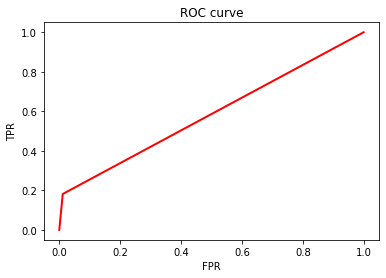

True Positives (TP): we correctly predicted that they avail Term Deposit 280

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11886

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1261 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 136 Falsely predict negative Type II error


In [110]:
model_LR = LogisticRegression(solver="liblinear")
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)
coef_df = pd.DataFrame(model_LR.coef_)
coef_df['intercept'] = model_LR.intercept_
#print(coef_df)
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()
print(lg.summary2())
y_predict_train = model_LR.predict(X_train)
y_predict_test = model_LR.predict(X_test)

accuracy_score_train=metrics.accuracy_score(y_train,y_predict_train)
accuracy_score_test=metrics.accuracy_score(y_test,y_predict_test)

print("Logistic Model Accuracy Score for Train: {0:.4f} \n".format(accuracy_score_train*100))
print("Logistic Model Accuracy Score for Test: {0:.4f} \n".format(accuracy_score_test*100))

model_score_LR = model_LR.score(X_test, y_test)

print("Logistic Model Score : {} \n".format(model_score_LR*100))
cm_LR=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
df_cm_LR = pd.DataFrame(cm_LR, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix : \n\n{} ".format(df_cm_LR))

TP=cm_LR[0][0]
TN=cm_LR[1][1]
FP=cm_LR[0][1]
FN=cm_LR[1][0]

precision_LR=TP/TP+FP
recall_LR=TP/TP+FN
f1score_LR= 2*(recall_LR * precision_LR) / (recall_LR + precision_LR)
rascore_LR=roc_auc_score(y_predict_test,y_test)

print('\nLogistic Model Precision = {}'.format(precision_LR))
print('\nLogistic Model Recall  = {}'.format(recall_LR))
print('\nLogistic Model F1 Score  = {}'.format(f1score_LR))
print('\nLogistic Model ROC_AUC_SCORE = {}'.format(rascore_LR))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_test)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))



# KNN

Find best k value

In [111]:
ac_scores = []
n = np.arange(1,50)
neighbors = list(filter(lambda varX: varX % 2 == 1,n))
# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'uniform',algorithm='auto')
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 19


KNN Train Model Accuracy Score for KNN=19: 89.0163 

KNN Test Model Accuracy Score for KNN=19: 89.2207 

KNN Model Score for K=19: 89.22067389220673 
Confusion Matrix for KNN=19: 

          Predict 1  Predict 0
Actual 1        241       1300
Actual 0        162      11860 

KNN Model Precision with k=19 = 1301.0

KNN Model Recall with k=19 = 163.0

KNN Model F1 Score with k=19 = 289.7035519125683

KNN Model ROC_AUC_SCORE with k=19 = 0.7885807525554236


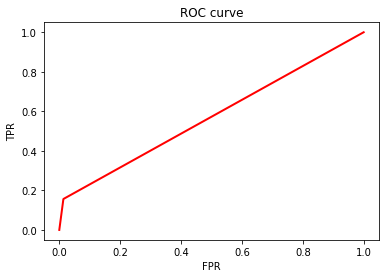

True Positives (TP): we correctly predicted that they avail Term Deposit 241

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11860

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1300 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 162 Falsely predict negative Type II error


In [52]:
model_KNN = KNeighborsClassifier(n_neighbors= 19 , weights = 'uniform',algorithm='auto')
model_KNN.fit(X_train, y_train)

y_KNN_predict_train = model_KNN.predict(X_train)
y_KNN_predict_test = model_KNN.predict(X_test)

accuracy_score_train_KNN=metrics.accuracy_score(y_train,y_KNN_predict_train)
accuracy_score_test_KNN=metrics.accuracy_score(y_test,y_KNN_predict_test)

print("KNN Train Model Accuracy Score for KNN=19: {0:.4f} \n".format(accuracy_score_train_KNN*100))
print("KNN Test Model Accuracy Score for KNN=19: {0:.4f} \n".format(accuracy_score_test_KNN*100))

model_score_KNN=model_KNN.score(X_test, y_test)
print("KNN Model Score for K=19: {} ".format(model_score_KNN*100))

cm_KNN=metrics.confusion_matrix(y_test, y_KNN_predict_test, labels=[1, 0])
df_cm_KNN = pd.DataFrame(cm_KNN, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for KNN=19: \n\n{} ".format(df_cm_KNN))

TP=cm_KNN[0][0]
TN=cm_KNN[1][1]
FP=cm_KNN[0][1]
FN=cm_KNN[1][0]

precision_KNN=TP/TP+FP
recall_KNN=TP/TP+FN
f1score_KNN= 2*(recall_KNN * precision_KNN) / (recall_KNN + precision_KNN)
rascore_KNN=roc_auc_score(y_predict,y_test)

print('\nKNN Model Precision with k=19 = {}'.format(precision_KNN))
print('\nKNN Model Recall with k=19 = {}'.format(recall_KNN))
print('\nKNN Model F1 Score with k=19 = {}'.format(f1score_KNN))
print('\nKNN Model ROC_AUC_SCORE with k=19 = {}'.format(rascore_KNN))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_KNN_predict_test)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# Naive Bayes

Naive Bayes Train Model Accuracy Score: 80.2667 

Naive Bayes Test Model Accuracy Score: 80.7122 

Naive Bayes Model Score: 80.7122

Confusion Matrix for Naive Bayes: 

          Predict 1  Predict 0
Actual 1        603        938
Actual 0       1678      10344 

Naive Bayes Precision  = 939.0

Naive Bayes Recall  = 1679.0

Naive Bayes F1 Score  = 1204.4163483575248

Naive Bayes ROC_AUC_SCORE  = 0.5906082254142165


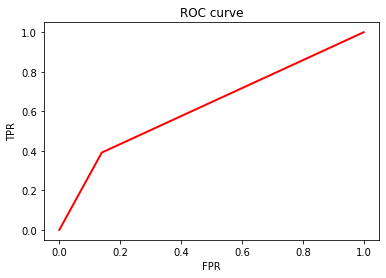

True Positives (TP): we correctly predicted that they avail Term Deposit 603

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 10344

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 938 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 1678 Falsely predict negative Type II error


In [112]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

y_NB_predict_train = model_NB.predict(X_train)
y_NB_predict_test = model_NB.predict(X_test)

accuracy_score_train_NB=metrics.accuracy_score(y_train,y_NB_predict_train)
accuracy_score_test_NB=metrics.accuracy_score(y_test,y_NB_predict_test)

print("Naive Bayes Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_NB*100))
print("Naive Bayes Test Model Accuracy Score: {0:.4f} \n".format(accuracy_score_test_NB*100))

model_NB_Score=model_NB.score(X_test,y_test)
print("Naive Bayes Model Score: {0:.4f}\n".format(model_NB_Score*100))
cm_NB=metrics.confusion_matrix(y_test, y_NB_predict_test, labels=[1, 0])
df_cm_NB = pd.DataFrame(cm_NB, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Naive Bayes: \n\n{} ".format(df_cm_NB))

TP=cm_NB[0][0]
TN=cm_NB[1][1]
FP=cm_NB[0][1]
FN=cm_NB[1][0]

precision_NB=TP/TP+FP
recall_NB=TP/TP+FN
f1score_NB= 2*(recall_NB * precision_NB) / (recall_NB + precision_NB)
rascore_NB=roc_auc_score(y_NB_predict_test,y_test)

print('\nNaive Bayes Precision  = {}'.format(precision_NB))
print('\nNaive Bayes Recall  = {}'.format(recall_NB))
print('\nNaive Bayes F1 Score  = {}'.format(f1score_NB))
print('\nNaive Bayes ROC_AUC_SCORE  = {}'.format(rascore_NB))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_NB_predict_test)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# SVC

SVC Accuracy on training set: 90.12
SVC Accuracy on test set: 89.51
SVC Model Score: 89.5082

Confusion Matrix for SVC : 

          Predict 1  Predict 0
Actual 1        228       1313
Actual 0        158      11864 
                          Imp
age                  0.155969
default              0.002814
balance              0.195392
housing              0.022194
loan                 0.012254
day                  0.142733
month                0.105171
campaign             0.064362
pdays                0.078604
previous             0.015484
JobId                0.077246
marital_married      0.008762
marital_single       0.011654
marital_divorced     0.009240
education_primary    0.009620
education_secondary  0.014888
education_tertiary   0.013266
education_unknown    0.005803
contact_cellular     0.017695
contact_telephone    0.002285
contact_unknown      0.005570
poutcome_failure     0.016020
poutcome_other       0.005654
poutcome_success     0.007252
poutcome_unknown     0.000064

SV

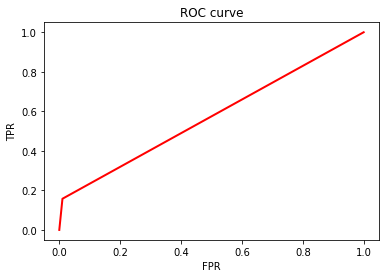

True Positives (TP): we correctly predicted that they avail Term Deposit 228

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11864

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1313 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 158 Falsely predict negative Type II error


In [118]:
model_svc = svm.SVC(gamma=0.025, C=3)  
model_svc.fit(X_train , y_train)

y_train_pred = model_svc.predict(X_train)
y_pred = model_svc.predict(X_test)

accuracy_score_train_SVC=metrics.accuracy_score(y_train,y_train_pred)
accuracy_score_test_SVC=metrics.accuracy_score(y_test,y_pred)

print("SVC Accuracy on training set: {:.2f}".format(accuracy_score_train_SVC*100))
print("SVC Accuracy on test set: {:.2f}".format(accuracy_score_test_SVC*100))

model_svc_Score=model_svc.score(X_test,y_test)

print("SVC Model Score: {0:.4f}\n".format(model_svc_Score*100))

cm_SVC=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_SVC = pd.DataFrame(cm_SVC, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for SVC : \n\n{} ".format(df_cm_SVC))

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

TP=cm_SVC[0][0]
TN=cm_SVC[1][1]
FP=cm_SVC[0][1]
FN=cm_SVC[1][0]

precision_SVC=TP/TP+FP
recall_SVC=TP/TP+FN
f1score_SVC= 2*(recall_SVC * precision_SVC) / (recall_SVC + precision_SVC)
rascore_SVC=roc_auc_score(y_pred,y_test)

print('\nSVC Model Precision  = {}'.format(precision_SVC))
print('\nSVC Model Recall  = {}'.format(recall_SVC))
print('\nSVC Model F1 Score  = {}'.format(f1score_SVC))
print('\nSVC Model ROC_AUC_SCORE  = {}'.format(rascore_SVC))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# Decison tree

Decision Tree Train Model Accuracy Score: 100.0000 

Decision Tree Test Model Accuracy Score: 83.4550 

Decision Tree Score: 83.4550

Confusion Matrix for Decision Tree: 

          Predict 1  Predict 0
Actual 1        479       1062
Actual 0       1182      10840 
                          Imp
age                  0.155969
default              0.002814
balance              0.195392
housing              0.022194
loan                 0.012254
day                  0.142733
month                0.105171
campaign             0.064362
pdays                0.078604
previous             0.015484
JobId                0.077246
marital_married      0.008762
marital_single       0.011654
marital_divorced     0.009240
education_primary    0.009620
education_secondary  0.014888
education_tertiary   0.013266
education_unknown    0.005803
contact_cellular     0.017695
contact_telephone    0.002285
contact_unknown      0.005570
poutcome_failure     0.016020
poutcome_other       0.005654
poutcome_succe

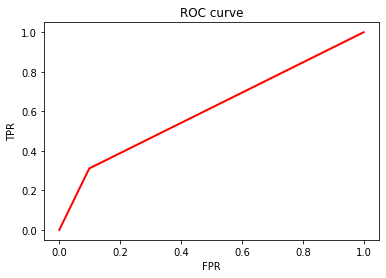

True Positives (TP): we correctly predicted that they avail Term Deposit 479

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 10840

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1062 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 1182 Falsely predict negative Type II error


In [55]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_features='auto' )
dt_model.fit(X_train, y_train)

y_DT_predict_train = dt_model.predict(X_train)
y_DT_predict_test = dt_model.predict(X_test)

accuracy_score_train_DT=metrics.accuracy_score(y_train,y_DT_predict_train)
accuracy_score_test_DT=metrics.accuracy_score(y_test,y_DT_predict_test)


print("Decision Tree Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_DT*100))
print("Decision Tree Test Model Accuracy Score: {0:.4f} \n".format(accuracy_score_test_DT*100))

test_pred = dt_model.predict(X_test)
model_DT_Score=dt_model.score(X_test,y_test)
print("Decision Tree Score: {0:.4f}\n".format(model_DT_Score*100))
cm_DT=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_DT = pd.DataFrame(cm_DT, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Decision Tree: \n\n{} ".format(df_cm_DT))

print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

TP=cm_DT[0][0]
TN=cm_DT[1][1]
FP=cm_DT[0][1]
FN=cm_DT[1][0]

precision_DT=TP/TP+FP
recall_DT=TP/TP+FN
f1score_DT= 2*(recall_DT * precision_DT) / (recall_DT + precision_DT)
rascore_DT=roc_auc_score(test_pred,y_test)

print('\nDecison Tree Model Precision  = {}'.format(precision_DT))
print('\nDecison Tree Model Recall  = {}'.format(recall_DT))
print('\nDecison Tree Model F1 Score  = {}'.format(f1score_DT))
print('\nDecison Tree Model ROC_AUC_SCORE  = {}'.format(rascore_DT))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_DT_predict_test)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# Randomforest

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Train Model Accuracy Score: 100.0000 

Random Forest Test Model Accuracy Score: 88.9258 

Random Forest Score: 83.4550

Confusion Matrix for Random Forest: 

          Predict 1  Predict 0
Actual 1        331       1210
Actual 0        292      11730 
                          Imp
age                  0.164196
default              0.003068
balance              0.196735
housing              0.024639
loan                 0.014451
day                  0.143175
month                0.093366
campaign             0.074236
pdays                0.051157
previous             0.024854
JobId                0.072180
marital_married      0.006437
marital_single       0.008697
marital_divorced     0.007531
education_primary    0.007662
education_secondary  0.010744
education_tertiary   0.010133
education_unknown    0.005316
contact_cellular     0.008279
contact_telephone    0.005475
contact_unknown      0.018063
poutcome_failure     0.009150
poutcome_other       0.003551
poutcome_succe

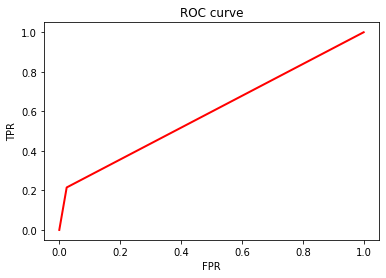

True Positives (TP): we correctly predicted that they avail Term Deposit 331

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11730

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1210 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 292 Falsely predict negative Type II error


In [56]:
rfcl = RandomForestClassifier(criterion = 'entropy',max_features ='log2',bootstrap=False)
rfcl = rfcl.fit(X_train, y_train)

test_pred = rfcl.predict(X_test)
train_pred= rfcl.predict(X_train)

accuracy_score_train_RF=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_RF=metrics.accuracy_score(y_test,test_pred)

print("Random Forest Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_RF*100))
print("Random Forest Test Model Accuracy Score: {0:.4f} \n".format(accuracy_score_test_RF*100))


model_RF_Score=dt_model.score(X_test,y_test)

print("Random Forest Score: {0:.4f}\n".format(model_RF_Score*100))
cm_RF=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_RF = pd.DataFrame(cm_RF, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Random Forest: \n\n{} ".format(df_cm_RF))

print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model

TP=cm_RF[0][0]
TN=cm_RF[1][1]
FP=cm_RF[0][1]
FN=cm_RF[1][0]

precision_RF=TP/TP+FP
recall_RF=TP/TP+FN
f1score_RF= 2*(recall_RF * precision_RF) / (recall_RF + precision_RF)
rascore_RF=roc_auc_score(test_pred,y_test)

print('\nRandom Forest Model Precision  = {}'.format(precision_RF))
print('\nRandom Forest Model Recall  = {}'.format(recall_RF))
print('\nRandom Forest Model F1 Score  = {}'.format(f1score_RF))
print('\nRandom Forest Model ROC_AUC_SCORE  = {}'.format(rascore_RF))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# ADAboosting

ADABoosting Train Model Accuracy Score: 89.1427 

ADABoosting Test Model Accuracy Score: 89.4419 

ADABoosting Score: 83.4550

Confusion Matrix for ADABoosting: 

          Predict 1  Predict 0
Actual 1        290       1251
Actual 0        181      11841 

ADAboosting Model Precision  = 1252.0

ADAboosting Model Recall  = 182.0

ADAboosting Model F1 Score  = 317.80195258019523

ADAboosting Model ROC_AUC_SCORE  = 0.7600783577660105


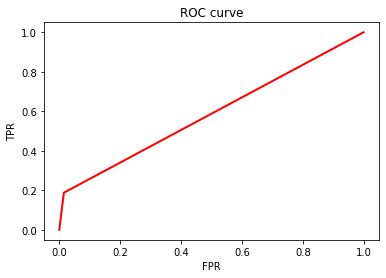

True Positives (TP): we correctly predicted that they avail Term Deposit 290

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11841

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1251 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 181 Falsely predict negative Type II error


In [57]:
abcl = AdaBoostClassifier()
abcl = abcl.fit(X_train, y_train)

test_pred = abcl.predict(X_test)
train_pred= abcl.predict(X_train)

accuracy_score_train_AB=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_AB=metrics.accuracy_score(y_test,test_pred)

print("ADABoosting Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_AB*100))
print("ADABoosting Test Model Accuracy Score: {0:.4f} \n".format(accuracy_score_test_AB*100))

model_AB_Score=dt_model.score(X_test,y_test)

print("ADABoosting Score: {0:.4f}\n".format(model_AB_Score*100))

cm_AB=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_AB = pd.DataFrame(cm_AB, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for ADABoosting: \n\n{} ".format(df_cm_AB))

TP=cm_AB[0][0]
TN=cm_AB[1][1]
FP=cm_AB[0][1]
FN=cm_AB[1][0]

precision_AB=TP/TP+FP
recall_AB=TP/TP+FN
f1score_AB= 2*(recall_AB * precision_AB) / (recall_AB + precision_AB)
rascore_AB=roc_auc_score(test_pred,y_test)

print('\nADAboosting Model Precision  = {}'.format(precision_AB))
print('\nADAboosting Model Recall  = {}'.format(recall_AB))
print('\nADAboosting Model F1 Score  = {}'.format(f1score_AB))
print('\nADAboosting Model ROC_AUC_SCORE  = {}'.format(rascore_AB))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

AdaBoosting with different Base Estimator

AdaBoosting with Logistic Regression

ADABoosting Train Model Accuracy Score with LogisticRegression: 88.5929 

ADABoosting Test Model Accuracy Score with LogisticRegression: 89.0658 

ADABoosting Score with LogisticRegression: 83.4550

Confusion Matrix for ADABoosting with LogisticRegression: 

          Predict 1  Predict 0
Actual 1         98       1443
Actual 0         40      11982 

ADAboosting Model Precision with LogisticRegression  = 1444.0

ADAboosting Model Recall with LogisticRegression = 41.0

ADAboosting Model F1 Score with LogisticRegression = 79.73602693602693

ADAboosting Model ROC_AUC_SCORE with LogisticRegression = 0.8013294470083394


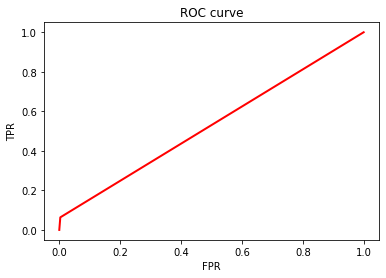

True Positives (TP): we correctly predicted that they avail Term Deposit 98

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11982

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1443 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 40 Falsely predict negative Type II error


In [58]:
abcl_LR = AdaBoostClassifier(LogisticRegression(solver="liblinear"))
abcl_LR = abcl_LR.fit(X_train, y_train)

test_pred = abcl_LR.predict(X_test)
train_pred= abcl_LR.predict(X_train)

accuracy_score_train_AB_LR=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_AB_LR=metrics.accuracy_score(y_test,test_pred)

print("ADABoosting Train Model Accuracy Score with LogisticRegression: {0:.4f} \n".format(accuracy_score_train_AB_LR*100))
print("ADABoosting Test Model Accuracy Score with LogisticRegression: {0:.4f} \n".format(accuracy_score_test_AB_LR*100))

model_AB_LR_Score=dt_model.score(X_test,y_test)

print("ADABoosting Score with LogisticRegression: {0:.4f}\n".format(model_AB_LR_Score*100))

cm_AB_LR=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_AB_LR = pd.DataFrame(cm_AB_LR, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for ADABoosting with LogisticRegression: \n\n{} ".format(df_cm_AB_LR))

TP=cm_AB_LR[0][0]
TN=cm_AB_LR[1][1]
FP=cm_AB_LR[0][1]
FN=cm_AB_LR[1][0]

precision_AB_LR=TP/TP+FP
recall_AB_LR=TP/TP+FN
f1score_AB_LR= 2*(recall_AB_LR * precision_AB_LR) / (recall_AB_LR + precision_AB_LR)
rascore_AB_LR=roc_auc_score(test_pred,y_test)

print('\nADAboosting Model Precision with LogisticRegression  = {}'.format(precision_AB_LR))
print('\nADAboosting Model Recall with LogisticRegression = {}'.format(recall_AB_LR))
print('\nADAboosting Model F1 Score with LogisticRegression = {}'.format(f1score_AB_LR))
print('\nADAboosting Model ROC_AUC_SCORE with LogisticRegression = {}'.format(rascore_AB_LR))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

AdaBoosting with Decision Tree

ADABoosting Train Model Accuracy Score with DecisionTree: 100.0000 

ADABoosting Test Model Accuracy Score with DecisionTree: 83.9564 

ADABoosting Score with DecisionTree: 83.4550

Confusion Matrix for ADABoosting with DecisionTree: 

          Predict 1  Predict 0
Actual 1        476       1065
Actual 0       1111      10911 

ADAboosting Model Precision with DecisionTree  = 1066.0

ADAboosting Model Recall with DecisionTree = 1112.0

ADAboosting Model F1 Score with DecisionTree = 1088.514233241506

ADAboosting Model ROC_AUC_SCORE with DecisionTree = 0.6055045661581512


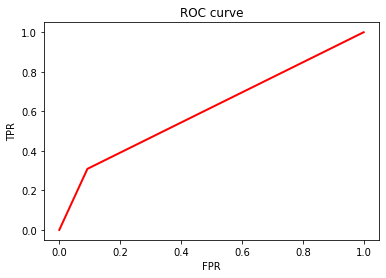

True Positives (TP): we correctly predicted that they avail Term Deposit 476

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 10911

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1065 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 1111 Falsely predict negative Type II error


In [59]:
abcl_DT = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy',max_features='auto' ))
abcl_DT = abcl_DT.fit(X_train, y_train)

test_pred = abcl_DT.predict(X_test)
train_pred= abcl_DT.predict(X_train)

accuracy_score_train_AB_DT=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_AB_DT=metrics.accuracy_score(y_test,test_pred)

print("ADABoosting Train Model Accuracy Score with DecisionTree: {0:.4f} \n".format(accuracy_score_train_AB_DT*100))
print("ADABoosting Test Model Accuracy Score with DecisionTree: {0:.4f} \n".format(accuracy_score_test_AB_DT*100))

model_AB_DT_Score=dt_model.score(X_test,y_test)

print("ADABoosting Score with DecisionTree: {0:.4f}\n".format(model_AB_DT_Score*100))

cm_AB_DT=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_AB_DT = pd.DataFrame(cm_AB_DT, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for ADABoosting with DecisionTree: \n\n{} ".format(df_cm_AB_DT))

TP=cm_AB_DT[0][0]
TN=cm_AB_DT[1][1]
FP=cm_AB_DT[0][1]
FN=cm_AB_DT[1][0]

precision_AB_DT=TP/TP+FP
recall_AB_DT=TP/TP+FN
f1score_AB_DT= 2*(recall_AB_DT * precision_AB_DT) / (recall_AB_DT + precision_AB_DT)
rascore_AB_DT=roc_auc_score(test_pred,y_test)

print('\nADAboosting Model Precision with DecisionTree  = {}'.format(precision_AB_DT))
print('\nADAboosting Model Recall with DecisionTree = {}'.format(recall_AB_DT))
print('\nADAboosting Model F1 Score with DecisionTree = {}'.format(f1score_AB_DT))
print('\nADAboosting Model ROC_AUC_SCORE with DecisionTree = {}'.format(rascore_AB_DT))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

AdaBoosting with Random Forest

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ADABoosting Train Model Accuracy Score with Random Forest: 100.0000 

ADABoosting Test Model Accuracy Score with Random Forest: 89.0069 

ADABoosting Score with Random Forest: 83.4550

Confusion Matrix for ADABoosting with Random Forest: 

          Predict 1  Predict 0
Actual 1        325       1216
Actual 0        275      11747 

ADAboosting Model Precision with Random Forest  = 1217.0

ADAboosting Model Recall with Random Forest = 276.0

ADAboosting Model F1 Score with Random Forest = 449.95579370395177

ADAboosting Model ROC_AUC_SCORE with Random Forest = 0.7239306101982566


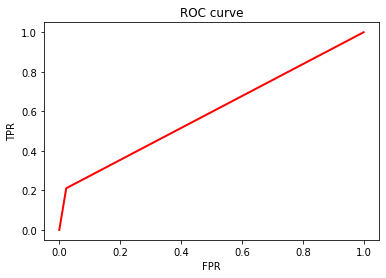

True Positives (TP): we correctly predicted that they avail Term Deposit 325

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11747

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1216 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 275 Falsely predict negative Type II error


In [60]:
abcl_RF = AdaBoostClassifier(RandomForestClassifier(criterion = 'entropy',max_features ='log2',bootstrap=False))
abcl_RF = abcl_RF.fit(X_train, y_train)

test_pred = abcl_RF.predict(X_test)
train_pred= abcl_RF.predict(X_train)

accuracy_score_train_AB_RF=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_AB_RF=metrics.accuracy_score(y_test,test_pred)

print("ADABoosting Train Model Accuracy Score with Random Forest: {0:.4f} \n".format(accuracy_score_train_AB_RF*100))
print("ADABoosting Test Model Accuracy Score with Random Forest: {0:.4f} \n".format(accuracy_score_test_AB_RF*100))

model_AB_RF_Score=dt_model.score(X_test,y_test)

print("ADABoosting Score with Random Forest: {0:.4f}\n".format(model_AB_RF_Score*100))

cm_AB_RF=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_AB_RF = pd.DataFrame(cm_AB_RF, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for ADABoosting with Random Forest: \n\n{} ".format(df_cm_AB_RF))

TP=cm_AB_RF[0][0]
TN=cm_AB_RF[1][1]
FP=cm_AB_RF[0][1]
FN=cm_AB_RF[1][0]

precision_AB_RF=TP/TP+FP
recall_AB_RF=TP/TP+FN
f1score_AB_RF= 2*(recall_AB_RF * precision_AB_RF) / (recall_AB_RF + precision_AB_RF)
rascore_AB_RF=roc_auc_score(test_pred,y_test)

print('\nADAboosting Model Precision with Random Forest  = {}'.format(precision_AB_RF))
print('\nADAboosting Model Recall with Random Forest = {}'.format(recall_AB_RF))
print('\nADAboosting Model F1 Score with Random Forest = {}'.format(f1score_AB_RF))
print('\nADAboosting Model ROC_AUC_SCORE with Random Forest = {}'.format(rascore_AB_RF))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# BAGGING

Bagging Train Model Accuracy Score: 98.4169 

Bagging Test Model Accuracy Score: 88.8889 

Bagging Score: 83.4550

Confusion Matrix for Bagging: 

          Predict 1  Predict 0
Actual 1        349       1192
Actual 0        315      11707 

Bagging Model Precision  = 1193.0

Bagging Model Recall  = 316.0

Bagging Model F1 Score  = 499.6527501656726

Bagging Model ROC_AUC_SCORE  = 0.716596072638488


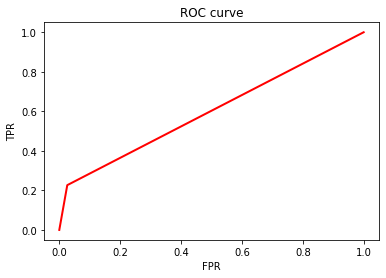

True Positives (TP): we correctly predicted that they avail Term Deposit 349

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11707

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1192 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 315 Falsely predict negative Type II error


In [61]:
bgcl = BaggingClassifier(bootstrap=True)
bgcl = bgcl.fit(X_train, y_train)

test_pred = bgcl.predict(X_test)
train_pred= bgcl.predict(X_train)

accuracy_score_train_B=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_B*100))
print("Bagging Test Model Accuracy Score: {0:.4f} \n".format(accuracy_score_test_B*100))

model_B_Score=dt_model.score(X_test,y_test)

print("Bagging Score: {0:.4f}\n".format(model_B_Score*100))

cm_B=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B = pd.DataFrame(cm_B, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging: \n\n{} ".format(df_cm_B))

TP=cm_B[0][0]
TN=cm_B[1][1]
FP=cm_B[0][1]
FN=cm_B[1][0]

precision_B=TP/TP+FP
recall_B=TP/TP+FN
f1score_B= 2*(recall_B * precision_B) / (recall_B + precision_B)
rascore_B=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision  = {}'.format(precision_B))
print('\nBagging Model Recall  = {}'.format(recall_B))
print('\nBagging Model F1 Score  = {}'.format(f1score_B))
print('\nBagging Model ROC_AUC_SCORE  = {}'.format(rascore_B))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

Bagging with Logistic Regression

Bagging Train Model Accuracy Score with LogisticRegression: 89.1712 

Bagging Test Model Accuracy Score with LogisticRegression: 89.6999 

Bagging Score with LogisticRegression: 83.4550

Confusion Matrix for Bagging with LogisticRegression: 

          Predict 1  Predict 0
Actual 1        276       1265
Actual 0        132      11890 

Bagging Model Precision with LogisticRegression = 1266.0

Bagging Model Recall with LogisticRegression = 133.0

Bagging Model F1 Score  with LogisticRegression= 240.7119370979271

Bagging Model ROC_AUC_SCORE with LogisticRegression = 0.7901547163905471


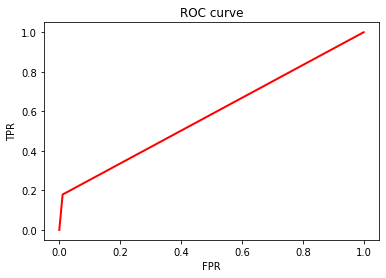

True Positives (TP): we correctly predicted that they avail Term Deposit 276

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11890

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1265 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 132 Falsely predict negative Type II error


In [62]:
bgcl_LR = BaggingClassifier(bootstrap=True,base_estimator=LogisticRegression(solver="liblinear"))
bgcl_LR = bgcl_LR.fit(X_train, y_train)

test_pred = bgcl_LR.predict(X_test)
train_pred= bgcl_LR.predict(X_train)

accuracy_score_train_B_LR=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B_LR=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score with LogisticRegression: {0:.4f} \n".format(accuracy_score_train_B_LR*100))
print("Bagging Test Model Accuracy Score with LogisticRegression: {0:.4f} \n".format(accuracy_score_test_B_LR*100))

model_B_LR_Score=dt_model.score(X_test,y_test)

print("Bagging Score with LogisticRegression: {0:.4f}\n".format(model_B_LR_Score*100))

cm_B_LR=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B_LR = pd.DataFrame(cm_B_LR, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging with LogisticRegression: \n\n{} ".format(df_cm_B_LR))

TP=cm_B_LR[0][0]
TN=cm_B_LR[1][1]
FP=cm_B_LR[0][1]
FN=cm_B_LR[1][0]

precision_B_LR=TP/TP+FP
recall_B_LR=TP/TP+FN
f1score_B_LR= 2*(recall_B_LR * precision_B_LR) / (recall_B_LR + precision_B_LR)
rascore_B_LR=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision with LogisticRegression = {}'.format(precision_B_LR))
print('\nBagging Model Recall with LogisticRegression = {}'.format(recall_B_LR))
print('\nBagging Model F1 Score  with LogisticRegression= {}'.format(f1score_B_LR))
print('\nBagging Model ROC_AUC_SCORE with LogisticRegression = {}'.format(rascore_B_LR))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

Bagging with Naive Bayes

Bagging Train Model Accuracy Score with Naive Bayes: 80.2446 

Bagging Test Model Accuracy Score with Naive Bayes: 80.8007 

Bagging Score with Naive Bayes: 83.4550

Confusion Matrix for Bagging with Naive Bayes: 

          Predict 1  Predict 0
Actual 1        595        946
Actual 0       1658      10364 

Bagging Model Precision with Naive Bayes = 947.0

Bagging Model Recall with Naive Bayes = 1659.0

Bagging Model F1 Score  with Naive Bayes= 1205.735226400614

Bagging Model ROC_AUC_SCORE with Naive Bayes = 0.5902247636808452


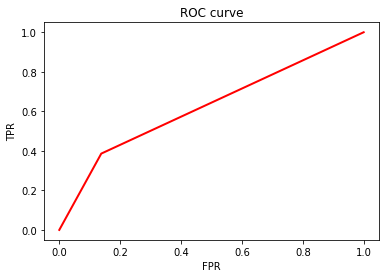

True Positives (TP): we correctly predicted that they avail Term Deposit 595

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 10364

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 946 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 1658 Falsely predict negative Type II error


In [63]:
bgcl_NB = BaggingClassifier(bootstrap=True,base_estimator=GaussianNB())
bgcl_NB = bgcl_NB.fit(X_train, y_train)

test_pred = bgcl_NB.predict(X_test)
train_pred= bgcl_NB.predict(X_train)

accuracy_score_train_B_NB=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B_NB=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score with Naive Bayes: {0:.4f} \n".format(accuracy_score_train_B_NB*100))
print("Bagging Test Model Accuracy Score with Naive Bayes: {0:.4f} \n".format(accuracy_score_test_B_NB*100))

model_B_NB_Score=dt_model.score(X_test,y_test)

print("Bagging Score with Naive Bayes: {0:.4f}\n".format(model_B_NB_Score*100))

cm_B_NB=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B_NB = pd.DataFrame(cm_B_NB, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging with Naive Bayes: \n\n{} ".format(df_cm_B_NB))

TP=cm_B_NB[0][0]
TN=cm_B_NB[1][1]
FP=cm_B_NB[0][1]
FN=cm_B_NB[1][0]

precision_B_NB=TP/TP+FP
recall_B_NB=TP/TP+FN
f1score_B_NB= 2*(recall_B_NB * precision_B_NB) / (recall_B_NB + precision_B_NB)
rascore_B_NB=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision with Naive Bayes = {}'.format(precision_B_NB))
print('\nBagging Model Recall with Naive Bayes = {}'.format(recall_B_NB))
print('\nBagging Model F1 Score  with Naive Bayes= {}'.format(f1score_B_NB))
print('\nBagging Model ROC_AUC_SCORE with Naive Bayes = {}'.format(rascore_B_NB))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

Bagging with KNN

Bagging Train Model Accuracy Score with KNN: 89.0258 

Bagging Test Model Accuracy Score with KNN: 89.1543 

Bagging Score with KNN: 83.4550

Confusion Matrix for Bagging with KNN: 

          Predict 1  Predict 0
Actual 1        228       1313
Actual 0        158      11864 

Bagging Model Precision with KNN = 1314.0

Bagging Model Recall with KNN = 159.0

Bagging Model F1 Score  with KNN= 283.67413441955193

Bagging Model ROC_AUC_SCORE with KNN = 0.745515128613564


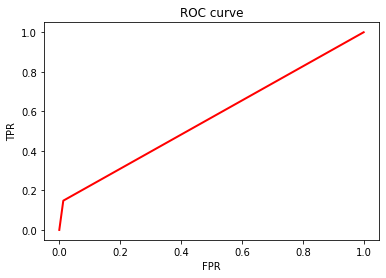

True Positives (TP): we correctly predicted that they avail Term Deposit 228

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11864

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1313 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 158 Falsely predict negative Type II error


In [116]:
bgcl_KNN = BaggingClassifier(bootstrap=True,base_estimator=KNeighborsClassifier(n_neighbors= 19 , weights = 'uniform',algorithm='auto'))
bgcl_KNN = bgcl_KNN.fit(X_train, y_train)

test_pred = bgcl_KNN.predict(X_test)
train_pred= bgcl_KNN.predict(X_train)

accuracy_score_train_B_KNN=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B_KNN=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score with KNN: {0:.4f} \n".format(accuracy_score_train_B_KNN*100))
print("Bagging Test Model Accuracy Score with KNN: {0:.4f} \n".format(accuracy_score_test_B_KNN*100))

model_B_KNN_Score=dt_model.score(X_test,y_test)

print("Bagging Score with KNN: {0:.4f}\n".format(model_B_KNN_Score*100))

cm_B_KNN=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B_KNN = pd.DataFrame(cm_B_KNN, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging with KNN: \n\n{} ".format(df_cm_B_KNN))

TP=cm_B_KNN[0][0]
TN=cm_B_KNN[1][1]
FP=cm_B_KNN[0][1]
FN=cm_B_KNN[1][0]

precision_B_KNN=TP/TP+FP
recall_B_KNN=TP/TP+FN
f1score_B_KNN= 2*(recall_B_KNN * precision_B_KNN) / (recall_B_KNN + precision_B_KNN)
rascore_B_KNN=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision with KNN = {}'.format(precision_B_KNN))
print('\nBagging Model Recall with KNN = {}'.format(recall_B_KNN))
print('\nBagging Model F1 Score  with KNN= {}'.format(f1score_B_KNN))
print('\nBagging Model ROC_AUC_SCORE with KNN = {}'.format(rascore_B_KNN))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

Bagging with SVM

Bagging Train Model Accuracy Score with SVC: 90.1444 

Bagging Test Model Accuracy Score with SVC: 89.4714 

Bagging Score with SVC: 83.4550

Confusion Matrix for Bagging with SVC: 

          Predict 1  Predict 0
Actual 1        237       1304
Actual 0        124      11898 

Bagging Model Precision with SVC = 1305.0

Bagging Model Recall with SVC = 125.0

Bagging Model F1 Score  with SVC= 228.14685314685315

Bagging Model ROC_AUC_SCORE with SVC = 0.7788683910479441


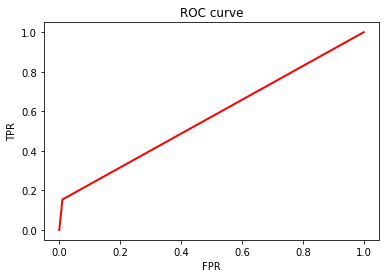

True Positives (TP): we correctly predicted that they avail Term Deposit 237

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11898

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1304 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 124 Falsely predict negative Type II error


In [115]:
bgcl_SVC = BaggingClassifier(bootstrap=True,base_estimator=SVC(gamma=0.025, C=3))
bgcl_SVC = bgcl_SVC.fit(X_train, y_train)

test_pred = bgcl_SVC.predict(X_test)
train_pred= bgcl_SVC.predict(X_train)

accuracy_score_train_B_SVC=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B_SVC=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score with SVC: {0:.4f} \n".format(accuracy_score_train_B_SVC*100))
print("Bagging Test Model Accuracy Score with SVC: {0:.4f} \n".format(accuracy_score_test_B_SVC*100))

model_B_SVC_Score=dt_model.score(X_test,y_test)

print("Bagging Score with SVC: {0:.4f}\n".format(model_B_SVC_Score*100))

cm_B_SVC=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B_SVC = pd.DataFrame(cm_B_SVC, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging with SVC: \n\n{} ".format(df_cm_B_SVC))

TP=cm_B_SVC[0][0]
TN=cm_B_SVC[1][1]
FP=cm_B_SVC[0][1]
FN=cm_B_SVC[1][0]

precision_B_SVC=TP/TP+FP
recall_B_SVC=TP/TP+FN
f1score_B_SVC= 2*(recall_B_SVC * precision_B_SVC) / (recall_B_SVC + precision_B_SVC)
rascore_B_SVC=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision with SVC = {}'.format(precision_B_SVC))
print('\nBagging Model Recall with SVC = {}'.format(recall_B_SVC))
print('\nBagging Model F1 Score  with SVC= {}'.format(f1score_B_SVC))
print('\nBagging Model ROC_AUC_SCORE with SVC = {}'.format(rascore_B_SVC))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

Bagging with Decision Tree

Bagging Train Model Accuracy Score with Decison Tree: 98.5022 

Bagging Test Model Accuracy Score with Decison Tree: 89.3239 

Bagging Score with Decison Tree: 83.4550

Confusion Matrix for Bagging with Decison Tree: 

          Predict 1  Predict 0
Actual 1        328       1213
Actual 0        235      11787 

Bagging Model Precision with Decison Tree = 1214.0

Bagging Model Recall with Decison Tree = 236.0

Bagging Model F1 Score  with Decison Tree= 395.17793103448275

Bagging Model ROC_AUC_SCORE with Decison Tree = 0.7446427790681787


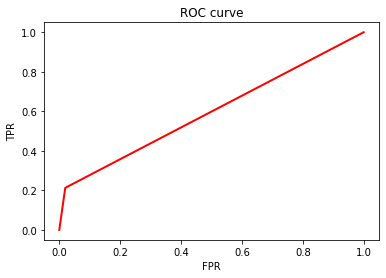

True Positives (TP): we correctly predicted that they avail Term Deposit 328

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11787

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1213 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 235 Falsely predict negative Type II error


In [113]:
bgcl_DT = BaggingClassifier(bootstrap=True,base_estimator=DecisionTreeClassifier(criterion = 'entropy',max_features='auto' ))
bgcl_DT = bgcl_DT.fit(X_train, y_train)

test_pred = bgcl_DT.predict(X_test)
train_pred= bgcl_DT.predict(X_train)

accuracy_score_train_B_DT=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B_DT=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score with Decison Tree: {0:.4f} \n".format(accuracy_score_train_B_DT*100))
print("Bagging Test Model Accuracy Score with Decison Tree: {0:.4f} \n".format(accuracy_score_test_B_DT*100))

model_B_DT_Score=dt_model.score(X_test,y_test)

print("Bagging Score with Decison Tree: {0:.4f}\n".format(model_B_DT_Score*100))

cm_B_DT=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B_DT = pd.DataFrame(cm_B_DT, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging with Decison Tree: \n\n{} ".format(df_cm_B_DT))

TP=cm_B_DT[0][0]
TN=cm_B_DT[1][1]
FP=cm_B_DT[0][1]
FN=cm_B_DT[1][0]

precision_B_DT=TP/TP+FP
recall_B_DT=TP/TP+FN
f1score_B_DT= 2*(recall_B_DT * precision_B_DT) / (recall_B_DT + precision_B_DT)
rascore_B_DT=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision with Decison Tree = {}'.format(precision_B_DT))
print('\nBagging Model Recall with Decison Tree = {}'.format(recall_B_DT))
print('\nBagging Model F1 Score  with Decison Tree= {}'.format(f1score_B_DT))
print('\nBagging Model ROC_AUC_SCORE with Decison Tree = {}'.format(rascore_B_DT))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

Bagging with Random Forest

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: T

Bagging Train Model Accuracy Score with Random Forest: 99.2796 

Bagging Test Model Accuracy Score with Random Forest: 89.5820 

Bagging Score with Random Forest: 83.4550

Confusion Matrix for Bagging with Random Forest: 

          Predict 1  Predict 0
Actual 1        357       1184
Actual 0        229      11793 

Bagging Model Precision with Random Forest = 1185.0

Bagging Model Recall with Random Forest = 230.0

Bagging Model F1 Score  with Random Forest= 385.22968197879857

Bagging Model ROC_AUC_SCORE with Random Forest = 0.7589883361505166


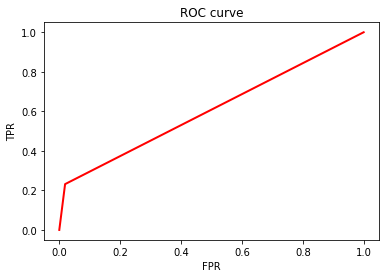

True Positives (TP): we correctly predicted that they avail Term Deposit 357

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11793

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1184 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 229 Falsely predict negative Type II error


In [114]:
bgcl_RF = BaggingClassifier(bootstrap=True,base_estimator=RandomForestClassifier(criterion = 'entropy',max_features ='log2',bootstrap=False))
bgcl_RF = bgcl_RF.fit(X_train, y_train)

test_pred = bgcl_RF.predict(X_test)
train_pred= bgcl_RF.predict(X_train)

accuracy_score_train_B_RF=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_B_RF=metrics.accuracy_score(y_test,test_pred)

print("Bagging Train Model Accuracy Score with Random Forest: {0:.4f} \n".format(accuracy_score_train_B_RF*100))
print("Bagging Test Model Accuracy Score with Random Forest: {0:.4f} \n".format(accuracy_score_test_B_RF*100))

model_B_RF_Score=dt_model.score(X_test,y_test)

print("Bagging Score with Random Forest: {0:.4f}\n".format(model_B_RF_Score*100))

cm_B_RF=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_B_RF = pd.DataFrame(cm_B_RF, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Bagging with Random Forest: \n\n{} ".format(df_cm_B_RF))

TP=cm_B_RF[0][0]
TN=cm_B_RF[1][1]
FP=cm_B_RF[0][1]
FN=cm_B_RF[1][0]

precision_B_RF=TP/TP+FP
recall_B_RF=TP/TP+FN
f1score_B_RF= 2*(recall_B_RF * precision_B_RF) / (recall_B_RF + precision_B_RF)
rascore_B_RF=roc_auc_score(test_pred,y_test)

print('\nBagging Model Precision with Random Forest = {}'.format(precision_B_RF))
print('\nBagging Model Recall with Random Forest = {}'.format(recall_B_RF))
print('\nBagging Model F1 Score  with Random Forest= {}'.format(f1score_B_RF))
print('\nBagging Model ROC_AUC_SCORE with Random Forest = {}'.format(rascore_B_RF))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# GradientBoost Classifier Algorithm

Gradient Boosting Train Model Accuracy Score: 89.7715 

Gradient Boosting Test Model Accuracy Score : 89.5967 

Gradient Boosting Score : 83.9490

Confusion Matrix for Gradient Boosting : 

          Predict 1  Predict 0
Actual 1        321       1220
Actual 0        191      11831 

Gradient Boosting Model Precision  = 1221.0

Gradient Boosting Model Recall  = 192.0

Gradient Boosting Model F1 Score  = 331.8216560509554

Gradient Boosting Model ROC_AUC_SCORE  = 0.7667368490680792


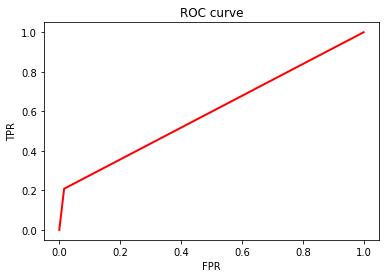

True Positives (TP): we correctly predicted that they avail Term Deposit 321

True Negatives (TN): we correctly predicted that they dont avail Term Deposit 11831

False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") 1220 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") 191 Falsely predict negative Type II error


In [49]:
gbcl = GradientBoostingClassifier()
gbcl = gbcl.fit(X_train, y_train)

test_pred = gbcl.predict(X_test)
train_pred= gbcl.predict(X_train)

accuracy_score_train_GB=metrics.accuracy_score(y_train,train_pred)
accuracy_score_test_GB=metrics.accuracy_score(y_test,test_pred)

print("Gradient Boosting Train Model Accuracy Score: {0:.4f} \n".format(accuracy_score_train_GB*100))
print("Gradient Boosting Test Model Accuracy Score : {0:.4f} \n".format(accuracy_score_test_GB*100))

model_GB_Score=dt_model.score(X_test,y_test)

print("Gradient Boosting Score : {0:.4f}\n".format(model_GB_Score*100))

cm_GB=metrics.confusion_matrix(y_test, test_pred, labels=[1, 0])
df_cm_GB = pd.DataFrame(cm_GB, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
print ("Confusion Matrix for Gradient Boosting : \n\n{} ".format(df_cm_GB))

TP=cm_GB[0][0]
TN=cm_GB[1][1]
FP=cm_GB[0][1]
FN=cm_GB[1][0]

precision_GB=TP/TP+FP
recall_GB=TP/TP+FN
f1score_GB= 2*(recall_GB * precision_GB) / (recall_GB + precision_GB)
rascore_GB=roc_auc_score(test_pred,y_test)

print('\nGradient Boosting Model Precision  = {}'.format(precision_GB))
print('\nGradient Boosting Model Recall  = {}'.format(recall_GB))
print('\nGradient Boosting Model F1 Score  = {}'.format(f1score_GB))
print('\nGradient Boosting Model ROC_AUC_SCORE  = {}'.format(rascore_GB))

fpr, tpr, thresholds = metrics.roc_curve(y_test, test_pred)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',lw=2, label='ROC curve')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

print('True Positives (TP): we correctly predicted that they avail Term Deposit {}\n'.format(TP))

print('True Negatives (TN): we correctly predicted that they dont avail Term Deposit {}\n'.format(TN))

print('False Positives (FP): we incorrectly predicted that they avail Term Deposit (a "Type I error") {} Falsely predict positive Type I error'.format(FP))

print('\nFalse Negatives (FN): we incorrectly predicted that they dont avail Term Deposit (a "Type II error") {} Falsely predict negative Type II error'.format(FN))

# Final Conclusion:

Model Score of Different Models

In [66]:
print('Model Score of Logistic Regression : {}'.format(model_score_LR*100))
print('Precison of Logistic Regression : {}'.format(precision_LR))
print('Recall Score of Logistic Regression : {}'.format(recall_LR))
print('F1 Score Score of Logistic Regression : {}'.format(f1score_LR))
print('RAC Score of Logistic Regression : {}'.format(rascore_LR))

print('\nModel Score of KNN : {}'.format(model_score_KNN*100))
print('Precison of KNN : {}'.format(precision_KNN))
print('Recall Score of KNN : {}'.format(recall_KNN))
print('F1 Score Score of KNN : {}'.format(f1score_KNN))
print('RAC Score of KNN : {}'.format(rascore_KNN))

print('\nModel Score of Naive Bayes : {}'.format(model_NB_Score*100))
print('Precison of Naive Bayes : {}'.format(precision_NB))
print('Recall Score of Naive Bayes : {}'.format(recall_NB))
print('F1 Score Score of Naive Bayes : {}'.format(f1score_NB))
print('RAC Score of Naive Bayes : {}'.format(rascore_NB))

print('\nModel Score of SVC : {}'.format(model_svc_Score*100))
print('Precison of SVC : {}'.format(precision_SVC))
print('Recall Score of SVC : {}'.format(recall_SVC))
print('F1 Score Score of SVC : {}'.format(f1score_SVC))
print('RAC Score of SVC : {}'.format(rascore_SVC))

print('\nModel Score of Decision Tree : {}'.format(model_DT_Score*100))
print('Precison of Decision Tree : {}'.format(precision_DT))
print('Recall Score of Decision Tree : {}'.format(recall_DT))
print('F1 Score Score of Decision Tree : {}'.format(f1score_DT))
print('RAC Score of Decision Tree : {}'.format(rascore_DT))

print('\nModel Score of Random Forest : {}'.format(model_RF_Score*100))
print('Precison of Random Forest : {}'.format(precision_RF))
print('Recall Score of Random Forest : {}'.format(recall_RF))
print('F1 Score Score of Random Forest : {}'.format(f1score_RF))
print('RAC Score of Random Forest : {}'.format(rascore_RF))

print('\nModel Score of AdaBoosting : {}'.format(model_AB_Score*100))
print('Precison of AdaBoosting : {}'.format(precision_AB))
print('Recall Score of AdaBoosting : {}'.format(recall_AB))
print('F1 Score Score of AdaBoosting : {}'.format(f1score_AB))
print('RAC Score of AdaBoosting : {}'.format(rascore_AB))

print('\nModel Score of AdaBoosting with Logistic Regression: {}'.format(model_AB_LR_Score*100))
print('Precison of AdaBoosting with Logistic Regression: {}'.format(precision_AB_LR))
print('Recall Score of AdaBoosting with Logistic Regression: {}'.format(recall_AB_LR))
print('F1 Score Score of AdaBoosting with Logistic Regression: {}'.format(f1score_AB_LR))
print('RAC Score of AdaBoosting with Logistic Regression: {}'.format(rascore_AB_LR))


print('\nModel Score of AdaBoosting with Decision Tree: {}'.format(model_AB_DT_Score*100))
print('Precison of AdaBoosting with Decision Tree: {}'.format(precision_AB_DT))
print('Recall Score of AdaBoosting with Decision Tree: {}'.format(recall_AB_DT))
print('F1 Score Score of AdaBoosting with Decision Tree: {}'.format(f1score_AB_DT))
print('RAC Score of AdaBoosting with Decision Tree: {}'.format(rascore_AB_DT))


print('\nModel Score of AdaBoosting with Random Forest: {}'.format(model_AB_RF_Score*100))
print('Precison of AdaBoosting with Random Forest: {}'.format(precision_AB_RF))
print('Recall Score of AdaBoosting with Random Forest: {}'.format(recall_AB_RF))
print('F1 Score Score of AdaBoosting with Random Forest: {}'.format(f1score_AB_RF))
print('RAC Score of AdaBoosting with Random Forest: {}'.format(rascore_AB_RF))


print('\nModel Score of Bagging: {}'.format(model_B_Score*100))
print('Precison of Bagging : {}'.format(precision_B))
print('Recall Score of Bagging : {}'.format(recall_B))
print('F1 Score Score of Bagging : {}'.format(f1score_B))
print('RAC Score of Bagging : {}'.format(rascore_B))


print('\nModel Score of Bagging with Logistic Regression: {}'.format(model_B_LR_Score*100))
print('Precison of Bagging with Logistic Regression: {}'.format(precision_B_LR))
print('Recall Score of Bagging with Logistic Regression: {}'.format(recall_B_LR))
print('F1 Score Score of Bagging with Logistic Regression: {}'.format(f1score_B_LR))
print('RAC Score of Bagging with Logistic Regression: {}'.format(rascore_B_LR))


print('\nodel Score of Bagging with Naive Bayes: {}'.format(model_B_NB_Score*100))
print('Precison of Bagging with Naive Bayes: {}'.format(precision_B_NB))
print('Recall Score of Bagging with Naive Bayes: {}'.format(recall_B_NB))
print('F1 Score Score of Bagging with Naive Bayes: {}'.format(f1score_B_NB))
print('RAC Score of Bagging with Naive Bayes: {}'.format(rascore_B_NB))


print('\nModel Score of Bagging with KNN: {}'.format(model_B_KNN_Score*100))
print('Precison of Bagging with KNN: {}'.format(precision_B_KNN))
print('Recall Score of Bagging with KNN: {}'.format(recall_B_KNN))
print('F1 Score Score of Bagging with KNN: {}'.format(f1score_B_KNN))
print('RAC Score of Bagging with KNN: {}'.format(rascore_B_KNN))


print('\nModel Score of Bagging with SVC: {}'.format(model_B_SVC_Score*100))
print('Precison of Bagging with SVC: {}'.format(precision_B_SVC))
print('Recall Score of Bagging with SVC: {}'.format(recall_B_SVC))
print('F1 Score Score of Bagging with SVC: {}'.format(f1score_B_SVC))
print('RAC Score of Bagging with SVC: {}'.format(rascore_B_SVC))

print('\nModel Score of Bagging with Decision Tree: {}'.format(model_B_DT_Score*100))
print('Precison of Bagging with Decision Tree: {}'.format(precision_B_DT))
print('Recall Score of Bagging with Decision Tree: {}'.format(recall_B_DT))
print('F1 Score Score of Bagging with Decision Tree: {}'.format(f1score_B_DT))
print('RAC Score of Bagging with Decision Tree: {}'.format(rascore_B_DT))

print('\nModel Score of Bagging with Random Forest: {}'.format(model_B_RF_Score*100))
print('Precison of Bagging with Random Forest: {}'.format(precision_B_RF))
print('Recall Score of Bagging with Random Forest: {}'.format(recall_B_RF))
print('F1 Score Score of Bagging with Random Forest: {}'.format(f1score_B_RF))
print('RAC Score of Bagging with Random Forest: {}'.format(rascore_B_RF))


print('\nModel Score of Gradient Boosting: {}'.format(model_GB_Score*100))
print('Precison of Gradient Boosting: {}'.format(precision_GB))
print('Recall Score of Gradient Boosting: {}'.format(recall_GB))
print('F1 Score Score of Gradient Boosting: {}'.format(f1score_GB))
print('RAC Score of Gradient Boosting: {}'.format(rascore_GB))

Model Score of Logistic Regression : 89.6999188969992
Precison of Logistic Regression : 1262.0
Recall Score of Logistic Regression : 137.0
F1 Score Score of Logistic Regression : 247.16797712651893
RAC Score of Logistic Regression : 0.7885807525554236

Model Score of KNN : 89.22067389220673
Precison of KNN : 1301.0
Recall Score of KNN : 163.0
F1 Score Score of KNN : 289.7035519125683
RAC Score of KNN : 0.7885807525554236

Model Score of Naive Bayes : 80.71223180712231
Precison of Naive Bayes : 939.0
Recall Score of Naive Bayes : 1679.0
F1 Score Score of Naive Bayes : 1204.4163483575248
RAC Score of Naive Bayes : 0.5906082254142165

Model Score of SVC : 89.50822089508222
Precison of SVC : 1101.0
Recall Score of SVC : 1168.0
F1 Score Score of SVC : 1133.5107977082416
RAC Score of SVC : 0.7809777460171013

Model Score of Decision Tree : 83.45498783454988
Precison of Decision Tree : 1063.0
Recall Score of Decision Tree : 1183.0
F1 Score Score of Decision Tree : 1119.7943009795192
RAC Score

From the above comparision Logsistic Regression Model is the best fit.